# Time Series Forecasting Methods

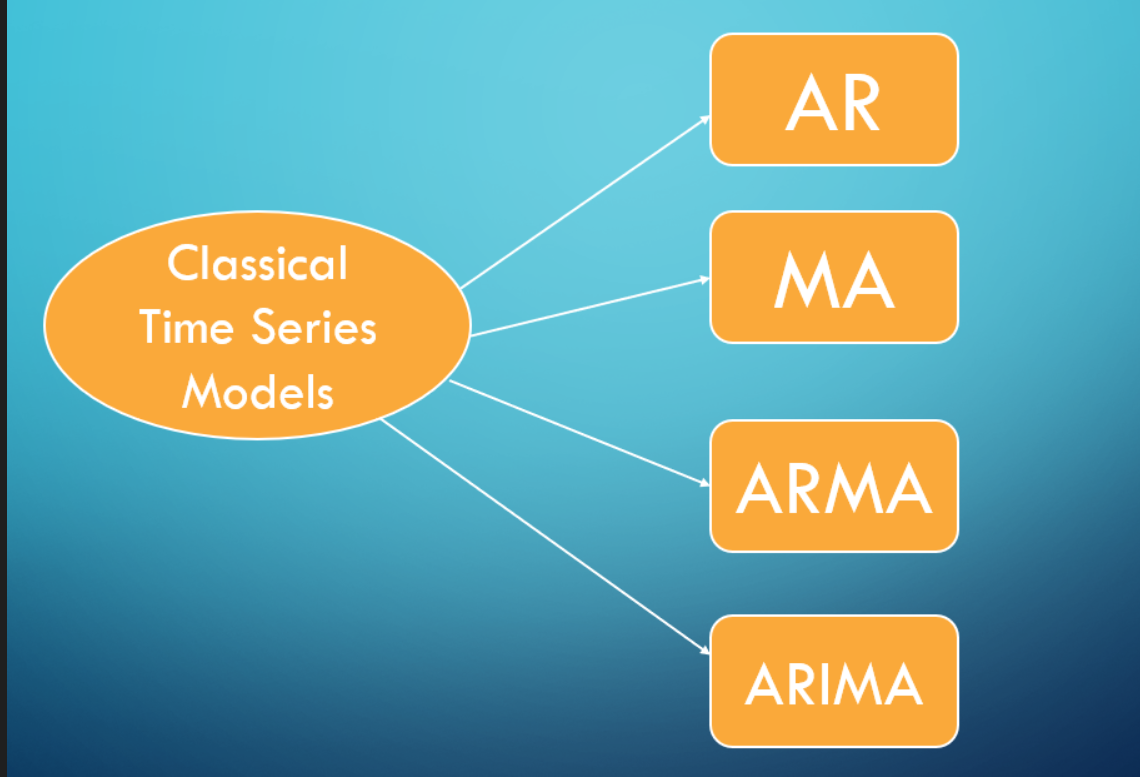

In [33]:
# put image here
from IPython.display import Image
Image(filename='images/models.png') 

In [34]:
import warnings
warnings.filterwarnings('ignore')

# Auto regression example

In [35]:
# Auto Regression example - suitable for data without trend and seasonal component
from statsmodels.tsa.ar_model import AutoReg

# create a linear data
data = [10,12,14,16,18,20,20,22] #linear data 

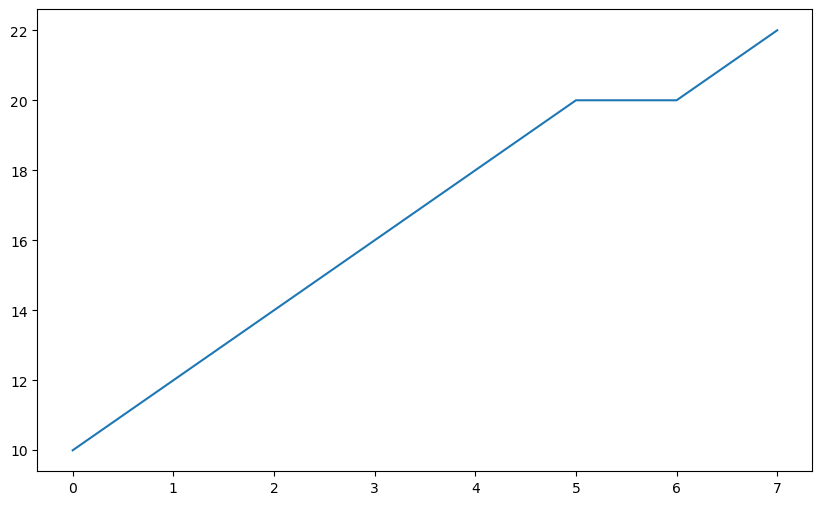

In [36]:
import matplotlib.pyplot as plt
plt.plot(data)

In [37]:
ARmodel = AutoReg(data, lags=1) #calling Auto regression model
ARmodel_fit = ARmodel.fit() #Fitting model

In [38]:
# making predictions
ypredicted = ARmodel_fit.predict(8,10)
print(ypredicted)

[23.125      24.14453125 25.06848145]


In [39]:
pred_list = ypredicted.tolist()
combinedlist = data+pred_list

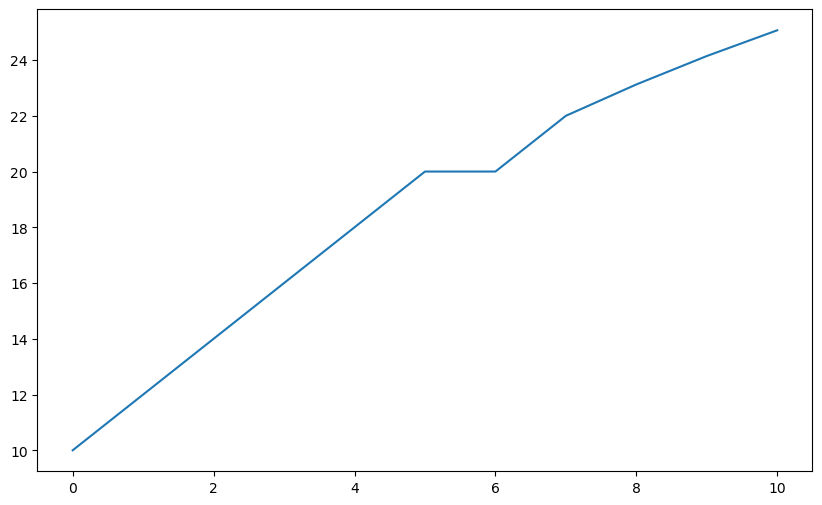

In [40]:
plt.plot(combinedlist)

# Moving average example

In [41]:
from statsmodels.tsa.arima.model import ARIMA


In [42]:
import statsmodels
print(statsmodels.__version__)


0.14.0


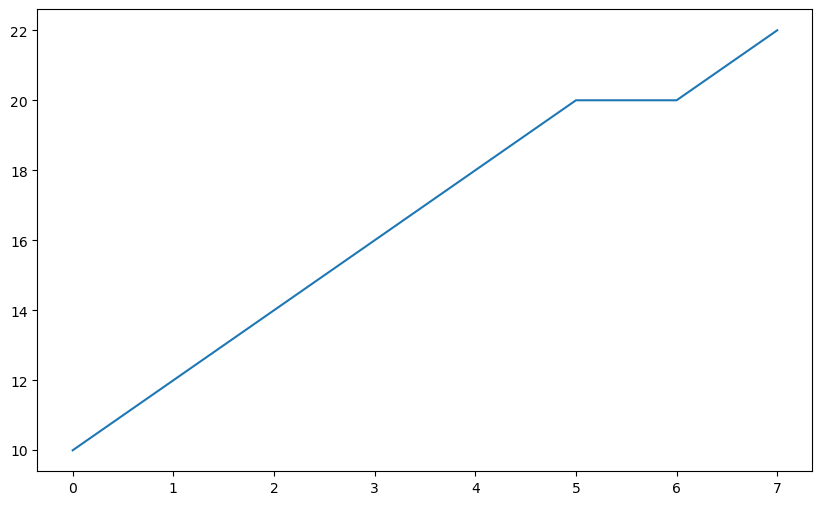

In [43]:
import matplotlib.pyplot as plt
plt.plot(data)

In [44]:
# fit model
MAmodel =  ARIMA(data, order=(0, 0,1)) #model with AR=0 and MA=1
MAmodel_fit = MAmodel.fit()

In [45]:
# make prediction
ypredicted = MAmodel_fit.predict(8,10)
print(ypredicted)

[20.35252229 16.49895187 16.49895187]


In [46]:
pred_list = ypredicted.tolist()
combinedlist = data+pred_list

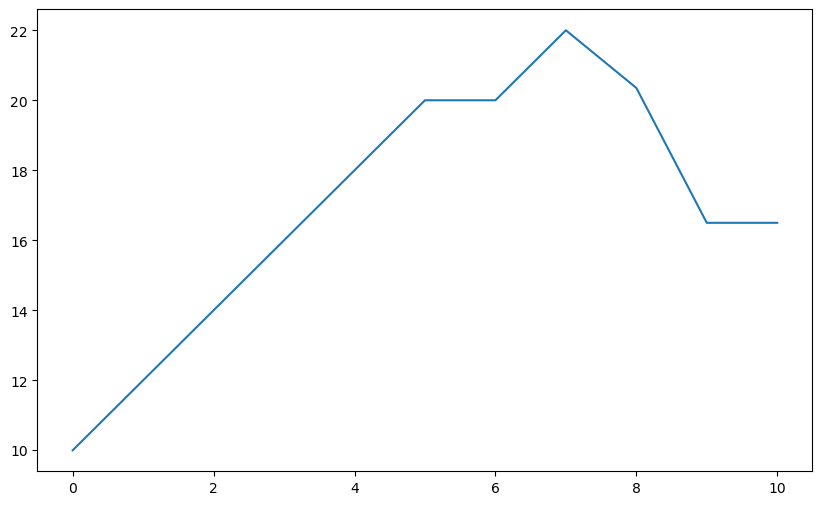

In [47]:
plt.plot(combinedlist)

# Autoregressive Moving Average (ARMA)

In [48]:
# Import Data -  Australian Drug Sales
import pandas as pd
DrugSalesData = pd.read_csv('datasets/TimeSeries_dataset.csv', parse_dates=['Date'], index_col='Date')

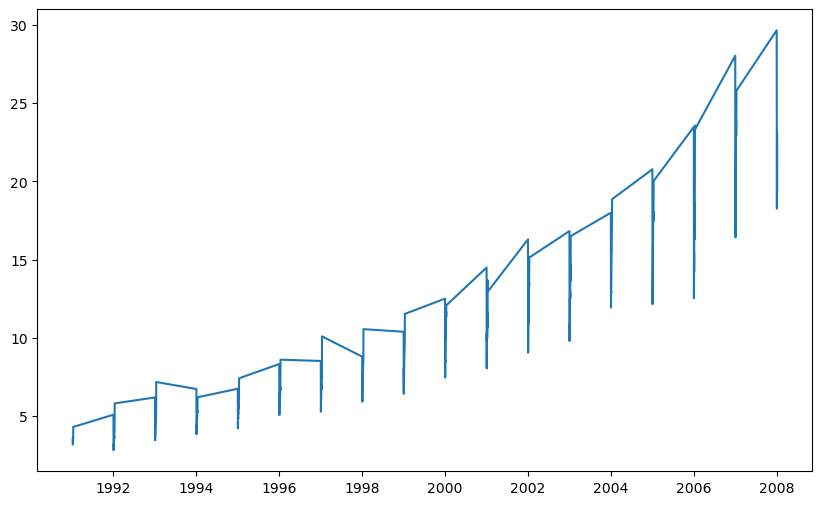

In [49]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(DrugSalesData['Value'])

In [50]:
from statsmodels.tsa.arima.model import ARIMA

In [51]:
# fit model
ARMAmodel = ARIMA(DrugSalesData['Value'], order=(1, 0, 1))
ARMAmodel_fit = ARMAmodel.fit()

In [52]:
# make prediction
ypredicted = ARMAmodel_fit.predict(len(DrugSalesData), len(DrugSalesData)+2)
print(ypredicted)

204    21.237107
205    21.181974
206    21.127162
Name: predicted_mean, dtype: float64


# Autoregressive Integrated Moving Average (ARIMA)

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [54]:
# fit model
ARIMAmodel = SARIMAX(DrugSalesData['Value'], order=(1, 1, 1)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit(disp=False)

# make prediction
ypredicted = ARIMA_model_fit.predict(len(DrugSalesData), len(DrugSalesData)+2, typ='levels')
print(ypredicted)

204    21.203378
205    21.736449
206    21.896846
Name: predicted_mean, dtype: float64
